# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Iqbal Aditama
- **Email:** muhammadiqbal.22006@mhs.unesa.ac.id
- **ID Dicoding:** aaditt21

## Menentukan Pertanyaan Bisnis

- Apakah Variabel season, hr, weekday saling mempengaruhi dalam peminjaman sepeda?
- berapa jumlah cluster yang memiliki cluster sangat ramai?

## Import Semua Packages/Library yang Digunakan

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
import pandas as pd
from pandas import read_csv
from mpl_toolkits.mplot3d import Axes3D

## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_csv("/content/day.csv")

### Assessing Data

In [3]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


### Cleaning Data

In [4]:
df.dropna(axis=0, inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
num_season = df.groupby("season")
num_yr = df.groupby("yr")
num_weekday = df.groupby("weekday")

# Create a list to hold the data
data = []
# Iterate over the groups in each GroupBy object
for season, season_df in num_season:
    for yr, yr_df in num_yr:
        for weekday, weekday_df in num_weekday:
            # Append a dictionary containing the group keys and any aggregated values to the data list
            data.append({"season": season, "yr": yr, "weekday": weekday})

# Create the DataFrame from the data list
df = pd.DataFrame(data)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [18]:
#membuat data training
x_train = df[['season', 'yr', 'weekday']]
x_train

,season,yr,weekday
0,1,0,0
1,1,0,1
2,1,0,2
3,1,0,3
4,1,0,4
5,1,0,5
6,1,0,6
7,1,1,0
8,1,1,1
9,1,1,2


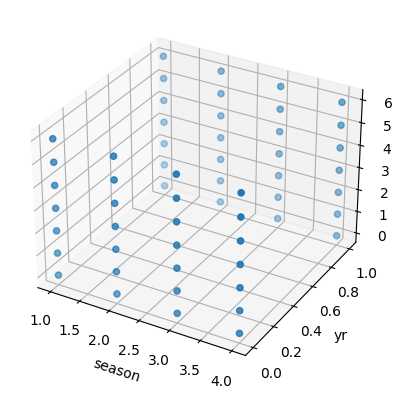

In [13]:
x = df['season']
y = df['yr']
z = df['weekday']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)

ax.set_xlabel('season')
ax.set_ylabel('yr')
ax.set_zlabel('Weekday')

plt.show()

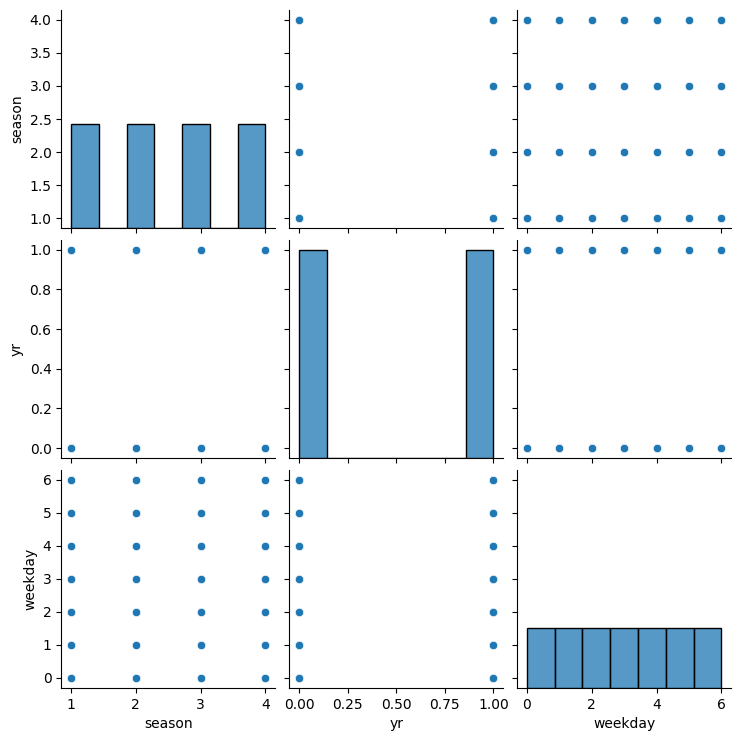

In [33]:
# membuat plot untuk menggambarkan hubungan antar kolom tertentu
sns.pairplot(df[['season', 'yr', 'weekday']])
plt.show()

In [19]:
#melakukan feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.16666667],
       [0.        , 0.        , 0.33333333],
       [0.        , 0.        , 0.5       ],
       [0.        , 0.        , 0.66666667],
       [0.        , 0.        , 0.83333333],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.16666667],
       [0.        , 1.        , 0.33333333],
       [0.        , 1.        , 0.5       ],
       [0.        , 1.        , 0.66666667],
       [0.        , 1.        , 0.83333333],
       [0.        , 1.        , 1.        ],
       [0.33333333, 0.        , 0.        ],
       [0.33333333, 0.        , 0.16666667],
       [0.33333333, 0.        , 0.33333333],
       [0.33333333, 0.        , 0.5       ],
       [0.33333333, 0.        , 0.66666667],
       [0.33333333, 0.        , 0.83333333],
       [0.33333333, 0.        , 1.        ],
       [0.33333333, 1.        , 0.        ],
       [0.

In [20]:
#membuat clustering
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
y_cluster = kmean.fit_predict(x_train)

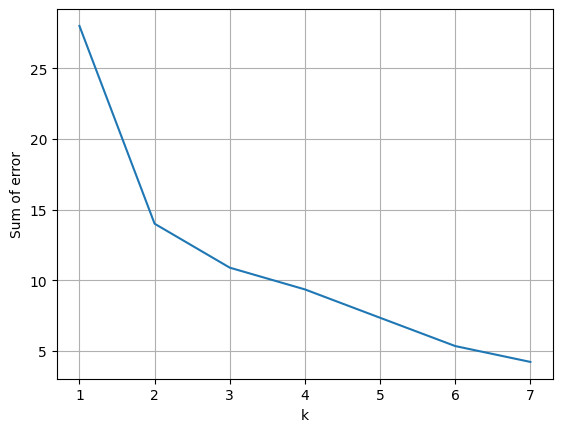

In [21]:
#Mencari k (jumlah Cluster) terbaik
inertias = []
k_range = range(1,8)
for k in k_range:
  km = KMeans(n_clusters=k).fit(x_train)
  inertias.append(km.inertia_)
plt.xlabel("k")
plt.ylabel("Sum of error")
plt.plot(k_range,inertias)
plt.grid()

In [22]:
#menambahkan kolom baru dengan nama cluster pada data
df['Cluster'] = y_cluster
df

,season,yr,weekday,Cluster
0,1,0,0,1
1,1,0,1,1
2,1,0,2,1
3,1,0,3,1
4,1,0,4,1
5,1,0,5,1
6,1,0,6,1
7,1,1,0,0
8,1,1,1,0
9,1,1,2,0


In [23]:
#mencari centroid
kmean.cluster_centers_

array([[0.16666667, 1.        , 0.5       ],
       [0.5       , 0.        , 0.5       ],
       [0.83333333, 1.        , 0.5       ]])

<ipython-input-24-5b092f4d8e92>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[0,0], kmean.cluster_centers_[0,1], cmap='rainbow', marker='*', s=150, label='centroid 0')
<ipython-input-24-5b092f4d8e92>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[1,0], kmean.cluster_centers_[1,1], cmap='rainbow', marker='*', s=150, label='centroid 1')
<ipython-input-24-5b092f4d8e92>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[2,0], kmean.cluster_centers_[2,1], cmap='rainbow', marker='*', s=150, label='centroid 2')


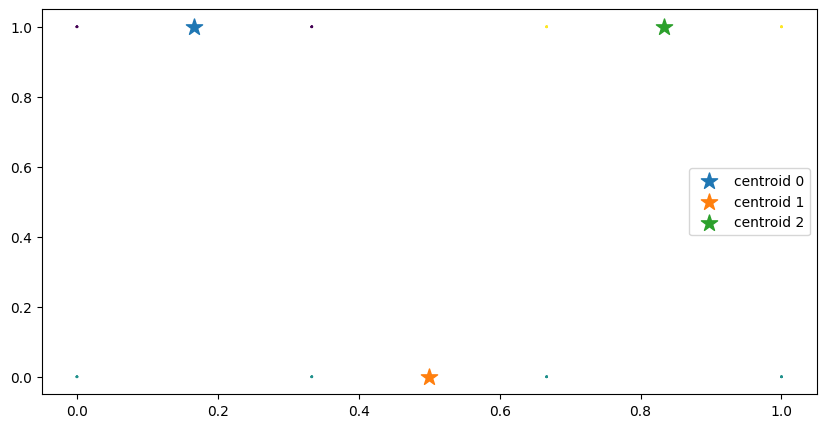

In [24]:
#visualisasi data hasil clustering dengan centroid
plt.figure(figsize=(10,5))
plt.scatter(x_train[:,0], x_train[:,1],x_train[:,2],c=kmean.labels_)
plt.scatter(kmean.cluster_centers_[0,0], kmean.cluster_centers_[0,1], cmap='rainbow', marker='*', s=150, label='centroid 0')
plt.scatter(kmean.cluster_centers_[1,0], kmean.cluster_centers_[1,1], cmap='rainbow', marker='*', s=150, label='centroid 1')
plt.scatter(kmean.cluster_centers_[2,0], kmean.cluster_centers_[2,1], cmap='rainbow', marker='*', s=150, label='centroid 2')

plt.legend()

In [25]:
#merubah indeks clustering
df['Cluster'] = df['Cluster'].replace([0,1,2],['Sangat ramai','ramai','kurang ramai'])
df

,season,yr,weekday,Cluster
0,1,0,0,ramai
1,1,0,1,ramai
2,1,0,2,ramai
3,1,0,3,ramai
4,1,0,4,ramai
5,1,0,5,ramai
6,1,0,6,ramai
7,1,1,0,Sangat ramai
8,1,1,1,Sangat ramai
9,1,1,2,Sangat ramai


### Pertanyaan 2:

In [40]:
#Mengetahui Jumlah Data Tiap Cluster
jumlah_data_cluster = df['Cluster'].value_counts()
print("Jumlah data untuk setiap jenis cluster:")
print(jumlah_data_cluster)

Jumlah data untuk setiap jenis cluster:
Cluster
ramai           28
Sangat ramai    14
kurang ramai    14
Name: count, dtype: int64


**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Dari ke 3 variabel tersebut tidak terjadi saling mempengaruhi dimana penyewaan sepeda pada variabek season, yr, dan weekday tidak mesti akan ramai. jadi dengan adanya analisis ini diharapkan bisa dikembangkan lagi agar menjadi lebih akurat  
- 14